<a href="https://colab.research.google.com/github/hattamhmmd/UAS-Forecast_Muhammad-Hatta-Ilham_3333210039_Kelas-C/blob/main/3333210039_Muhammad_Hatta_Ilham_UAS_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama: Muhammad Hatta Ilham**

**NIM: 3333210039**

**Kelas: C**

**Mata Kuliah: Analitika Data**

**Dataset: Adani Group Stock Prices 2016-2023**


---



**Time Series**

A time-series is a series of data points indexed in time order and it is used to predict the future based on the previous observed values. Time series are very frequently plotted via line charts. Time series are used in statistics , weather forecasting, stock price prediction, pattern recognititon, earthquake prediction, e.t.c.

Time series analysis comprises methods for analysing time series data in order to extract meaningful statistics and other characteristics of the data.

Time series forecasting is the use of a model to predict future values based on previously observed values.

**Import Library**

Pertama-tama import library yang akan digunakan


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
%matplotlib inline

1. Mengimpor pandas dengan alias pd untuk manipulasi dan analisis data.
2. Mengimpor numpy dengan alias np untuk operasi matematika dan manipulasi array.
3. Mengimpor matplotlib.pyplot dengan alias plt untuk membuat grafik dan plot.
4. Mengimpor seaborn untuk visualisasi data statistik yang menarik dan informatif.
5. Mengimpor math untuk fungsi matematika yang kompleks.
6. Mengimpor datetime untuk bekerja dengan waktu dan tanggal.
7. Menggunakan %matplotlib inline untuk menampilkan output plot matplotlib di halaman notebook secara langsung

**Import Dataset**

Dataset source : https://www.kaggle.com/datasets/kabhishm/adani-group-stock-prices-20162023

Import dataset yang sudah di upload di google drive dengan cara menyalin link google drive file tersebut.

In [25]:
# https://drive.google.com/file/d/17-MQxaYJ86blBHzb55koYLJI5XOqCs4V/view?usp=sharing

!gdown 17-MQxaYJ86blBHzb55koYLJI5XOqCs4V

Downloading...
From: https://drive.google.com/uc?id=17-MQxaYJ86blBHzb55koYLJI5XOqCs4V
To: /content/ADANIENT.NS.csv
100% 129k/129k [00:00<00:00, 124MB/s]


---
> Membaca file CSV 'ADANIENT.NS.csv' menggunakan fungsi read_csv() dari pandas. Hasilnya disimpan dalam variabel train_data. Fungsi ini mengubah data tabular dari file CSV menjadi DataFrame.

> Menggunakan metode head() dari train_data untuk menampilkan beberapa baris pertama dari DataFrame. Metode ini digunakan untuk melihat sebagian kecil data, biasanya lima baris pertama, dan tujuannya adalah memeriksa struktur dan isi data yang telah dibaca.



In [26]:
train_data = pd.read_csv('ADANIENT.NS.csv')
train_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-01,45.553741,49.422543,44.872616,49.095600,47.614208,10963906
1,2016-01-04,48.768658,50.158157,45.907928,46.371094,44.971912,9408965
2,2016-01-05,46.670792,48.823151,45.880684,48.278248,46.821522,9801814
3,2016-01-06,47.951309,48.468964,46.480076,46.997730,45.579639,7093448
4,2016-01-07,46.262115,46.262115,42.502296,43.564854,42.250347,8919023


Check missing values

In [27]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750 entries, 0 to 1749
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1750 non-null   object 
 1   Open       1750 non-null   float64
 2   High       1750 non-null   float64
 3   Low        1750 non-null   float64
 4   Close      1750 non-null   float64
 5   Adj Close  1750 non-null   float64
 6   Volume     1750 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 95.8+ KB


Dengan me-*running* train_data.info(), kita dapat melihat informasi tentang DataFrame train_data seperti jumlah kolom, nama kolom, tipe data, dan jumlah nilai non-null dalam setiap kolom. Ini berguna untuk memahami data yang sedang dianalisis dan memeriksa keberadaan nilai yang hilang (null) dalam DataFrame.


---



Check statistic vales for every features

In [28]:
train_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1.750000e+03
mean,688.173234,700.569161,675.238559,688.457278,687.474594,7.511264e+06
std,1021.967477,1036.977084,1004.148913,1021.222423,1021.504948,1.019781e+07
min,32.149174,33.402447,31.713251,32.012947,31.047001,2.482490e+05
25%,74.134321,75.891117,72.430996,74.392643,73.068065,2.789816e+06
50%,148.150002,152.000000,144.975006,148.025002,146.764984,4.716164e+06
75%,1193.587524,1237.750000,1173.500000,1198.837524,1197.533173,8.319164e+06
max,4175.000000,4190.000000,4066.399902,4165.299805,4165.299805,1.701502e+08


Coding diatas digunakan untuk menghasilkan ringkasan statistik deskriptif dari DataFrame seperti nilai rata-rata, standar deviasi, nilai minimum, kuartil, dan nilai maksimum dari kolom-kolom numerik dalam DataFrame


---



Handle datetime data for time series

In [29]:
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data.set_index('Date', inplace=True)
train_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-01,45.553741,49.422543,44.872616,49.095600,47.614208,10963906
2016-01-04,48.768658,50.158157,45.907928,46.371094,44.971912,9408965
2016-01-05,46.670792,48.823151,45.880684,48.278248,46.821522,9801814
2016-01-06,47.951309,48.468964,46.480076,46.997730,45.579639,7093448
2016-01-07,46.262115,46.262115,42.502296,43.564854,42.250347,8919023


Dengan menggunakan Coding diatas, data tanggal diubah menjadi tipe data datetime, dan kolom 'Date' diatur sebagai indeks. Hal ini memudahkan analisis berdasarkan waktu pada DataFrame tersebut.


---



**EXPLORATORY DATA ANALYSIS**

Now let’s visualise the Adjusted Close (Stock Price when market closed)

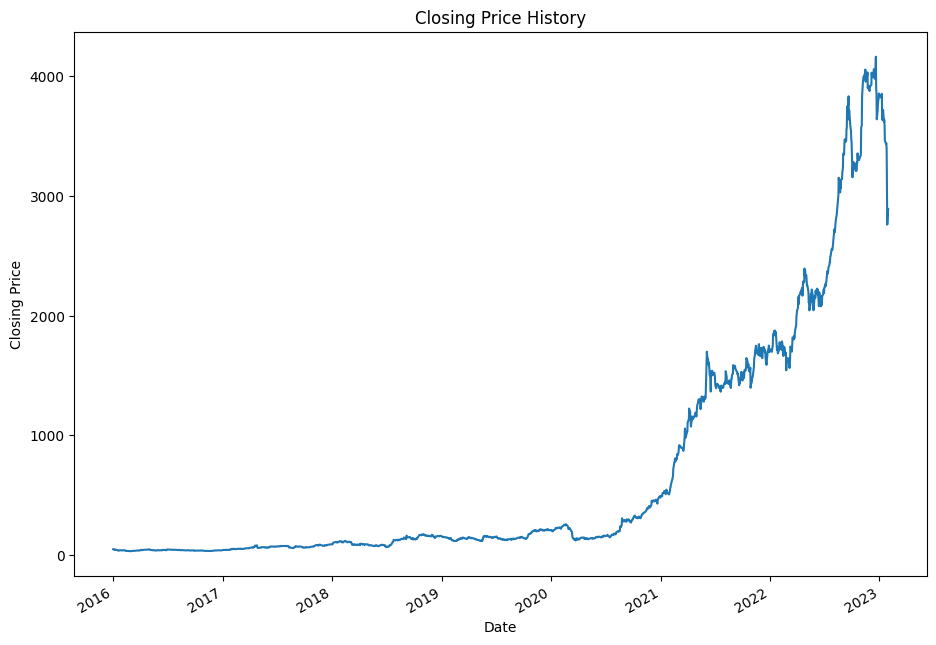

In [30]:
plt.figure(figsize=(11, 8)) # resizing the plot
train_data['Adj Close'].plot()
plt.title('Closing Price History') # adding a title
plt.xlabel('Date') # x label
plt.ylabel('Closing Price') # y label
plt.show()

 Dengan menggunakan codingan diatas akan dihasilkan sebuah plot terhadap *'Adj Close'* dengan sumbu x yang mewakili *'Date'* dan sumbu y yang mewakili *'Close Price'*.


> Dari grafik plot diatas dapat diketahui bahwa data menunjukkan pattern trend naik. Dikatakan pattern trend naik karena pattern data menggambarkan peningkatan seiring berjalannya waktu.



---



<Figure size 1600x800 with 0 Axes>

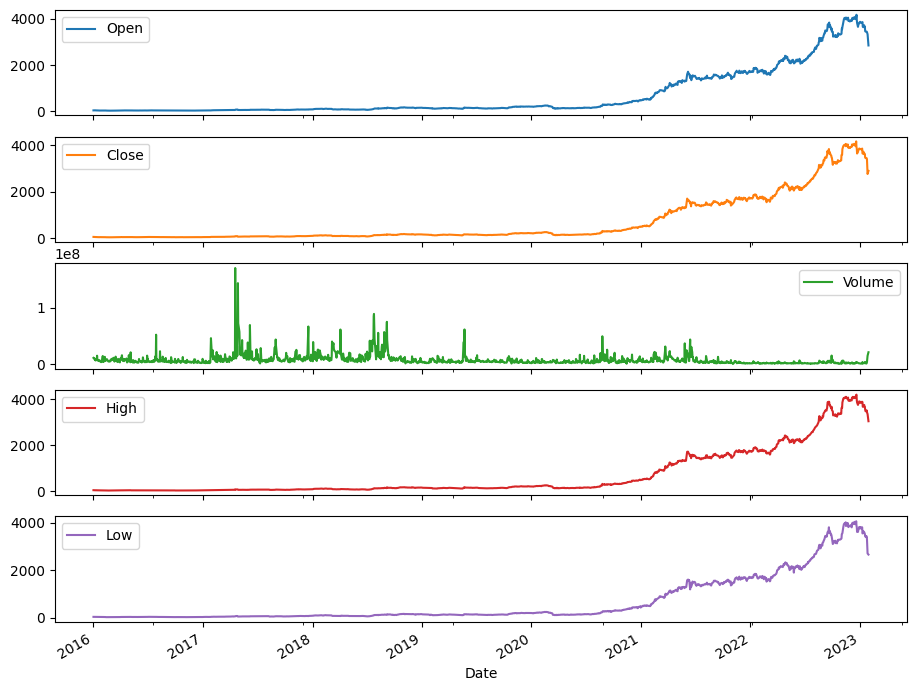

In [31]:
plt.figure(figsize=(16, 8)) # resizing the plot
cols = ['Open', 'Close', 'Volume', 'High', 'Low']
axes = train_data[cols].plot(figsize=(11, 9), subplots = True)
plt.show()

Dengan Coding diatas, akan dihasilkan beberapa plot dalam satu gambar. Setiap plot mewakili kolom yang ditentukan, yaitu 'Open', 'Close', 'Volume', 'High', dan 'Low'
> PPada data harga pembukaan (Open), harga penutupan (Close), harga tertinggi (High), dan harga terendah (Low), terlihat bahwa terdapat tren naik karena grafiknya menunjukkan pergerakan yang semakin meningkat. Sebaliknya, pada data jumlah transaksi saham (Volume), terlihat bahwa datanya cenderung stationer (naik turun)



---



In [32]:
train_data['HL_PCT'] = (train_data['High'] - train_data['Low']) / train_data['Low'] * 100.0
train_data['PCT_change'] = (train_data['Close'] - train_data['Open']) / train_data['Open'] * 100.0

Selanjutnya, kita membuat fitur baru untuk nantinya dimasukkan ke dalam dataset kita.
1.  Coding pertama digunakan untuk membagi selisih harga dengan harga terendah, kemudian dikalikan dengan 100. Hasilnya disimpan dalam kolom baru dengan nama 'HL_PCT'.
2.  Coding kedua digunakan untuk membagi selisih harga dengan harga pembukaan, kemudian dikalikan dengan 100.0. Hasilnya disimpan dalam kolom baru dengan nama 'PCT_change'.


---



In [33]:
df = train_data[['HL_PCT', 'PCT_change', 'Adj Close','Volume']]

Coding tersebut digunakan untuk membuat DataFrame baru yang terdiri dari kolom-kolom 'HL_PCT', 'PCT_change', 'Adj Close', dan 'Volume' dari DataFrame.


---



In [34]:
forecast_out = int(math.ceil(0.05 * len(df))) # forcasting out 5% of the entire dataset
print(forecast_out)
df['label'] = df['Adj Close'].shift(-forecast_out)

88


<ipython-input-34-8a15e8de9d0b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['Adj Close'].shift(-forecast_out)


1.   Coding pertama digunakan untuk menghitung jumlah baris yang akan diprediksi dengan mengalikan 5% dengan jumlah baris DataFrame. Hasilnya dibulatkan ke atas menggunakan fungsi math.ceil() dan disimpan dalam variabel forecast_out.
2.   Coding kedua digunakan untuk membuat kolom baru dengan nama 'label' dalam DataFrame. Nilai pada kolom 'label' diperoleh dengan menggeser (shift) nilai-nilai dari kolom 'Adj Close' ke atas sebanyak forecast_out baris.

Tujuan dari coding tersebut adalah untuk melakukan prediksi nilai 'Adj Close' beberapa periode ke depan berdasarkan data historis yang ada.


---



In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

Dengan menggunakan coding-coding tersebut, kita mengimpor pustaka-pustaka yang dibutuhkan untuk melakukan berbagai tahap dalam analisis data regresi.

1. StandardScaler digunakan untuk melakukan penskalaan fitur.
2. LinearRegression dan Ridge digunakan untuk melakukan prediksi berdasarkan hubungan linear antara fitur dan target.
3. RandomForestRegressor adalah kumpulan pohon keputusan (decision tree) untuk melakukan prediksi.
4. SVR adalah model regresi yang menggunakan metode Support Vector Machines (SVM) untuk melakukan prediksi.
5. train_test_split digunakan untuk membagi dataset menjadi subset train dan test, yang akan digunakan untuk melatih dan mengevaluasi model.
6. mean_squared_log_error digunakan untuk mengukur kesalahan atau error prediksi pada data.
---



It’s clear from the plot that there is an overall increase in the trend,with some seasonality in it.

Coding standardscaler digunakan untuk menormalisasikan data, karena data yang digunakan berbeda dan memiliki interval yang besar. Oleh karena itu diperlukan normalisasi untuk mempercepat training dan mengurangi bias.

In [36]:
scaler = StandardScaler()
X = np.array(df.drop(['label'], 1))
scaler.fit(X)
X = scaler.transform(X)

<ipython-input-36-7ce179678b12>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['label'], 1))


*   Pertama, kita membuat sebuah objek scaler yang akan digunakan untuk melakukan penskalaan.
*   Kemudian, kita mengambil nilai-nilai fitur dari DataFrame df dan menyimpannya dalam array X. Dalam proses ini, kolom 'label' dihilangkan karena kita hanya ingin mengambil fitur-fitur yang akan digunakan dalam pemodelan.
*   Selanjutnya, kita melakukan fitting (penyesuaian) objek scaler ke data fitur X. Dalam tahap ini, kita menghitung mean dan standar deviasi dari setiap fitur dalam data, yang akan digunakan dalam proses penskalaan.
*   Terakhir, kita mentransformasikan (mengubah) data fitur X menggunakan objek scaler. Dalam proses ini, nilai-nilai fitur diubah dengan menggunakan mean dan standar deviasi yang telah dihitung sebelumnya.


---



In [37]:
X_Predictions = X[-forecast_out:] # data to be predicted
X = X[:-forecast_out] # data to be trained

Coding diatas digunakan untuk membagi data fitur menjadi dua bagian, yaitu data yang akan diprediksi dan data yang akan digunakan untuk *trained*.


---



In [38]:
df.dropna(inplace=True)
y = np.array(df['label'])

<ipython-input-38-c3da9adb30d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


Dengan me-*running* coding tersebut, kita memastikan bahwa data yang memiliki nilai null telah dihapus dan kita memiliki array y yang berisi target yang sesuai dengan data fitur X.


---



In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Coding di atas digunakan untuk membagi data fitur (X) dan target (y) menjadi *train data* (X_train dan y_train) serta data uji (X_test dan y_test), dengan menggunakan fungsi train_test_split dari pustaka sklearn.model_selection


---



In [40]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_confidence = lr.score(X_test, y_test)

Dalam coding diatas, kita menggunakan model regresi linear (LinearRegression) untuk training data train (X_train dan y_train) sehingga model dapat belajar pola-pola dalam data tersebut.

Setelah training model, kita menggunakan data uji (X_test dan y_test) untuk mengevaluasi seberapa baik model kita dalam memprediksi nilai target pada data yang belum pernah dilihat sebelumnya.


---



In [41]:
lr_confidence

0.918746611256229

Ir_confidence digunakan untuk memanggil nilai koefisien determinasi dari model regresi linear terhadap data uji. Nilai ini mengindikasikan sejauh mana model dapat menjelaskan variasi dalam data uji. Semakin tinggi nilai lr_confidence (mendekati 1), semakin baik kinerja model dalam memprediksi nilai target dari data uji.

Didapatkan nilai 'lr.confidence' atau skor performa model regresi linear sebesar 0,919 atau 91,9%. yang berarti data train memiliki kemampuan yang baik dalam menjelaskan variasi dan memberikan prediksi yang akurat.

---



In [42]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_confidence = rf.score(X_test, y_test)

Dalam coding di atas, kita menggunakan model regresi acak (RandomForestRegressor) untuk training data train (X_train dan y_train) menggunakan metode fit(). Random forest merupakan model penjabaran dari linear regresi yang sistemnya menyeleksi model terbaik yang dipilih untuk *training and testing model*.

Setelah training model, kita menggunakan data uji (X_test dan y_test) untuk melakukan evaluasi menggunakan metode score().


---



In [43]:
rf_confidence

0.986764689604881

rf_confidence adalah variabel yang menyimpan nilai koefisien determinasi dari model regresi acak (RandomForestRegressor) terhadap data uji. Perintah ini memiliki fungsi dan indikasi yang sama seperti Ir_confidence.

Didapatkan nilai 'rf_confidence' atau skor performa model Random Forest sebesar 0,987 atau 98,7%. yang berarti data train memiliki kemampuan yang sangat baik dalam menjelaskan variasi dan memberikan prediksi yang akurat

---



In [44]:
last_date = df.index[-1] #getting the lastdate in the dataset
last_unix = last_date.timestamp() #converting it to time in seconds
one_day = 86400 #one day equals 86400 seconds
next_unix = last_unix + one_day # getting the time in seconds for the next day
forecast_set = rf.predict(X_Predictions) # predicting forecast data
df['Forecast'] = np.nan
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

<ipython-input-44-3eb2aa88d409>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Forecast'] = np.nan
<ipython-input-44-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
<ipython-input-44-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len

Coding diatas digunakan untuk membuat prediksi *'Forecast'* di masa depan menggunakan model regresi acak (RandomForestRegressor). Langkah-langkahnya meliputi mendapatkan tanggal terakhir dalam dataset, menghitung waktu untuk hari berikutnya, memprediksi data *forecast* dengan model, menambahkan kolom *'Forecast'* ke dalam DataFrame, dan memasukkan nilai prediksi ke dalam kolom tersebut dengan menggunakan waktu berikutnya sebagai indeks.


---



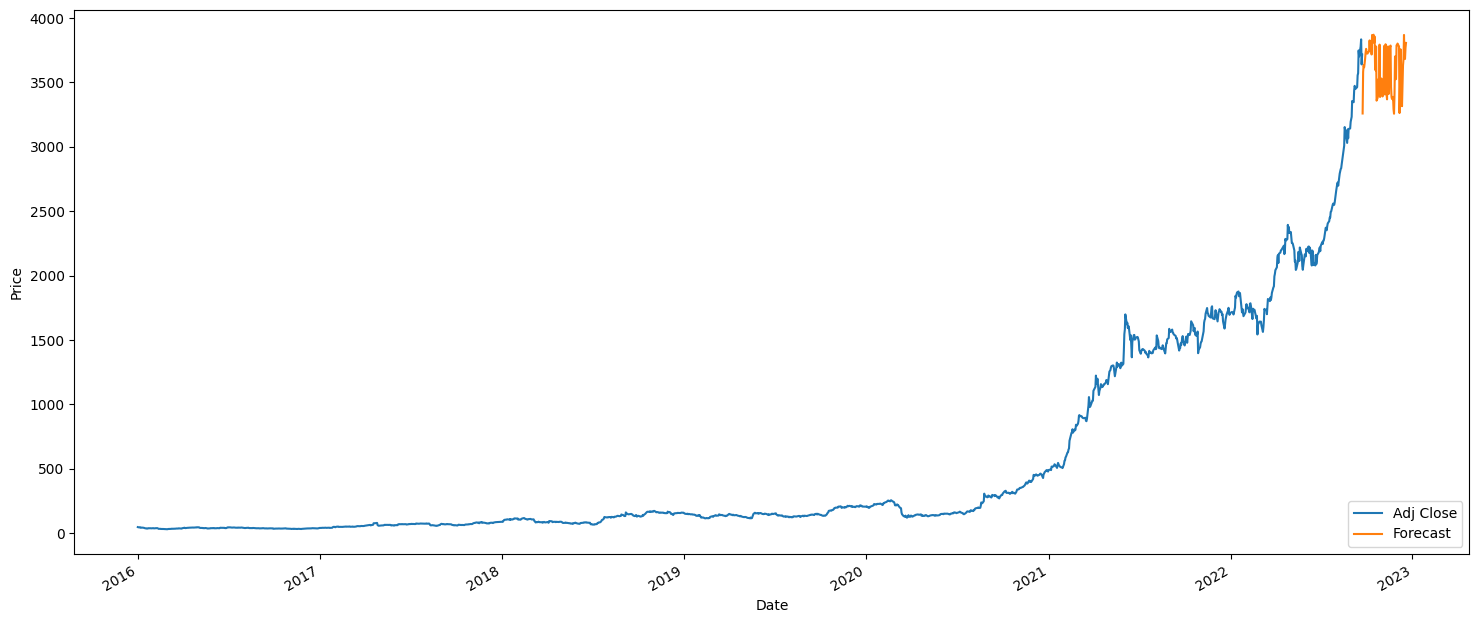

In [45]:
plt.figure(figsize=(18, 8))
df['Adj Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

Dengan coding tersebut, kita dapat melihat visualisasi grafik yang memperlihatkan data 'Adj Close' dan prediksi 'Forecast' dalam satu tampilan.

Dalam gambar di atas, garis berwarna oranye menunjukkan hasil peramalan (forecast) untuk harga penutupan 'Adj Close' di masa depan berdasarkan dataset yang ada.

Dengan menggunakan model random forest, model akan menggunakan data harga penutupan sebelumnya (garis berwarna biru) untuk membuat prediksi atau forecast harga penutupan berikutnya.

---

